In [1]:
import pandas as pd
import numpy as np

## Feature engineering 
#### with training.csv

In [2]:
df = pd.read_csv('training.csv')

del df['id']

#scalar for Clarity
df.loc[df.Clarity == "FL", "Clarity"] = 6
df.loc[df.Clarity == "IF", "Clarity"] = 5
df.loc[df.Clarity == "VVS1", "Clarity"] = 4
df.loc[df.Clarity == "VVS2", "Clarity"] = 4
df.loc[df.Clarity == "VS1", "Clarity"] = 3
df.loc[df.Clarity == "VS2", "Clarity"] = 3
df.loc[df.Clarity == "SI1", "Clarity"] = 2
df.loc[df.Clarity == "SI2", "Clarity"] = 2
df.loc[df.Clarity == "SI3", "Clarity"] = 2
df.loc[df.Clarity == "I1", "Clarity"] = 1
df.loc[df.Clarity == "I2", "Clarity"] = 1
df.loc[df.Clarity == "I3", "Clarity"] = 1
df.loc[df.Clarity == "N", "Clarity"] = 0
df.loc[df.Clarity == "None", "Clarity"] = 0
df.Clarity = df.Clarity.astype(int)

#scalar for color:
df.loc[df.Color == "D", "Color"] = 8
df.loc[df.Color == "E", "Color"] = 7
df.loc[df['Color'].astype(str).str[0] == "F", "Color"] = 6
df.loc[df.Color == "G", "Color"] = 5
df.loc[df.Color == "H", "Color"] = 4
df.loc[df.Color == "I", "Color"] = 3
df.loc[df.Color == "J", "Color"] = 2
df.loc[df.Color == "K", "Color"] = 1
df['Color'] = (
    pd.to_numeric(df['Color'],
                  errors='coerce')
      .fillna(0)
    )

#scalar for Cut
df.loc[df.Cut == "Ideal", "Cut"] = 5
df.loc[df.Cut == "Excellent", "Cut"] = 4
df.loc[df.Cut == "Very good", "Cut"] = 3
df.loc[df.Cut == "Good", "Cut"] = 2
df.loc[df.Cut == "Fair", "Cut"] = 1
df.loc[df.Cut == " ", "Cut"] = 0
df.Cut = df.Cut.astype(int)

#scalar for Fluroescence
df.loc[df.Fluroescence == "Very Stro..", "Fluroescence"] = 3
df.loc[df.Fluroescence == "Strong", "Fluroescence"] = 3
df.loc[df.Fluroescence == "Strong Bl..", "Fluroescence"] = 3
df.loc[df.Fluroescence == "Strong B", "Fluroescence"] = 3

df.loc[df.Fluroescence == "Medium Bl..", "Fluroescence"] = 2
df.loc[df.Fluroescence == "Medium", "Fluroescence"] = 2
df.loc[df.Fluroescence == "Medium Ye..", "Fluroescence"] = 2
df.loc[df.Fluroescence == "Medium B", "Fluroescence"] = 2

df.loc[df.Fluroescence == "Faint", "Fluroescence"] = 1
df.loc[df.Fluroescence == "Very Smal..", "Fluroescence"] = 1
df.loc[df.Fluroescence == "Faint Y", "Fluroescence"] = 1

df.loc[df.Fluroescence == "None", "Fluroescence"] = 0
df.loc[df.Fluroescence == ' ', "Fluroescence"] = 0
df.Fluroescence = df.Fluroescence.fillna(0)

df.Known_Conflict_Diamond = pd.Categorical(df.Known_Conflict_Diamond)
df['Known_Conflict_Diamond_Code'] = df.Known_Conflict_Diamond.cat.codes
del df['Known_Conflict_Diamond']

#scalar for Polish
df.loc[df.Polish == "Excellent", "Polish"] = 4
df.loc[df.Polish == "Very good", "Polish"] = 3
df.loc[df.Polish == "Good", "Polish"] = 2
df.loc[df.Polish == "Fair", "Polish"] = 1
df.loc[df.Polish == " ", "Polish"] = 0
df.Polish = df.Polish.astype(int)


df.loc[df.Shape == "Oval ", "Shape"] = "Oval"
df.loc[df.Shape == "ROUND", "Shape"] = "Round"

#scalar for Symmetry
df.loc[df.Symmetry == "Excellent", "Symmetry"] = 4
df.loc[df.Symmetry == "Execllent", "Symmetry"] = 4
df.loc[df.Symmetry == "Very good", "Symmetry"] = 3
df.loc[df.Symmetry == "Good", "Symmetry"] = 2
df.loc[df.Symmetry == "Fair", "Symmetry"] = 1
df.loc[df.Symmetry == "Faint", "Symmetry"] = 0
df.loc[df.Symmetry == " ", "Symmetry"] = 0
df.Symmetry = df.Symmetry.astype(int)

#df.Vendor = pd.Categorical(df.Vendor)
#df['Vendor'] = df.Vendor.cat.codes



In [3]:
df

,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail,Known_Conflict_Diamond_Code
0,0.41,NaN,2,0.0,0,65.4,0,4.65x4.62x3.03,3,Other/Unknown,Princess,2,NaN,1,$ 430,$ 850,6.063785,6.745236,0
1,0.42,AGSL,2,0.0,0,61.7,3,4.85x4.79x2.98,4,Russia,Marquise,3,NaN,1,$ 560,$ 920,6.327937,6.824374,0
2,0.40,AGSL,2,0.0,0,64.0,0,4.66x4.63x2.97,4,South Africa,Round,4,57.0,1,$ 560,$ 575,6.327937,6.354370,0
3,0.41,AGSL,2,0.0,0,62.7,3,4.71x4.69x2.95,3,Botswana,Round,3,58.0,1,$ 560,$ 825,6.327937,6.715383,0
4,0.40,AGSL,2,0.0,0,63.0,0,4.71x4.68x2.96,4,Botswana,Round,3,58.0,1,$ 580,$ 890,6.363028,6.791221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,3.51,AGSL,3,8.0,4,61.3,2,9.75x9.82x6.03,4,DR Congo,Round,4,56.0,2,"$ 201,685","$ 299,320",12.214462,12.609269,0
8046,3.51,NaN,2,4.0,4,62.3,2,9.72x9.78x6.07,4,Other/Unknown,Round,4,56.0,2,"$ 53,355","$ 85,110",10.884723,11.351700,0
8047,7.62,AGSL,5,4.0,4,NaN,1,12.6x12.68x7.74,4,South Africa,Round,4,NaN,2,"$ 586,790","$ 842,730",13.282422,13.644402,0
8048,1.49,AGSL,3,1.0,3,NaN,0,7.22x7.34x4.53,2,Russia,Round,2,57.0,3,"$ 9,490","$ 14,775",9.157994,9.600692,0


## Question 1

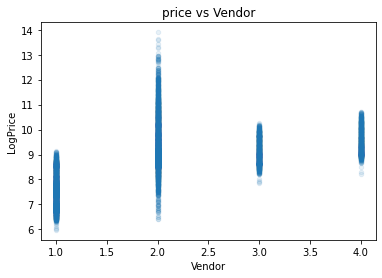

In [4]:
ax = df.plot.scatter(y = 'LogPrice', x="Vendor", title="price vs Vendor", alpha = 0.1)

<AxesSubplot:title={'center':'log price of offers vs Carats'}, xlabel='Carats', ylabel='LogPrice'>

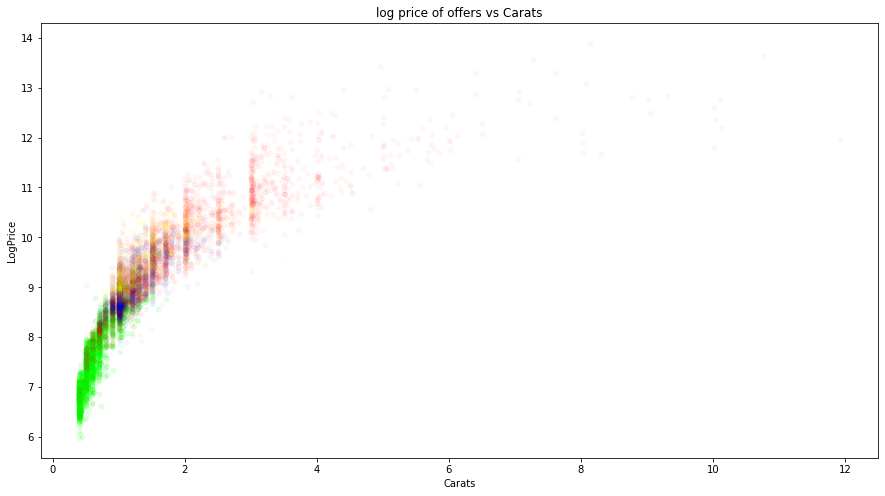

In [5]:
vendor1 = df[df['Vendor'] == 1]
vendor2 = df[df['Vendor'] == 2]
vendor3 = df[df['Vendor'] == 3]
vendor4 = df[df['Vendor'] == 4]
ax = vendor1.plot.scatter(figsize=(15,8), y = 'LogPrice', x='Carats', title="log price of offers vs Carats", color = "lime", alpha = 0.1)
vendor2.plot.scatter(ax=ax, figsize=(15,8), y = 'LogPrice', x = "Carats", color='red', alpha = 0.03)
vendor3.plot.scatter(ax=ax, figsize=(15,8), y = 'LogPrice', x = "Carats", color='blue', alpha = 0.03)
vendor4.plot.scatter(ax=ax, figsize=(15,8), y = 'LogPrice', x = "Carats", color='yellow', alpha = 0.03)

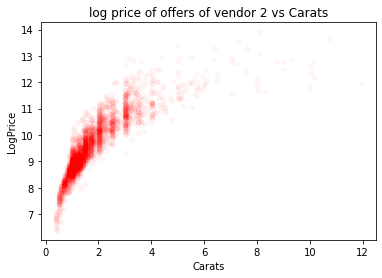

In [6]:
ax = vendor2.plot.scatter(y = 'LogPrice', x = "Carats", color='red', title="log price of offers of vendor 2 vs Carats", alpha = 0.03)

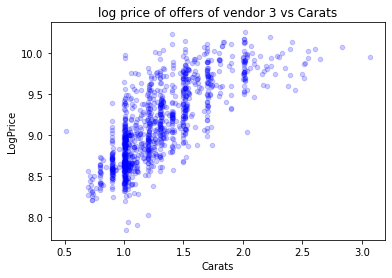

In [7]:
ax = vendor3.plot.scatter(y = 'LogPrice', x = "Carats", color='blue', title="log price of offers of vendor 3 vs Carats", alpha = 0.2)

<AxesSubplot:title={'center':'log price of offers of vendor 1 and 3 vs Carats'}, xlabel='Carats', ylabel='LogPrice'>

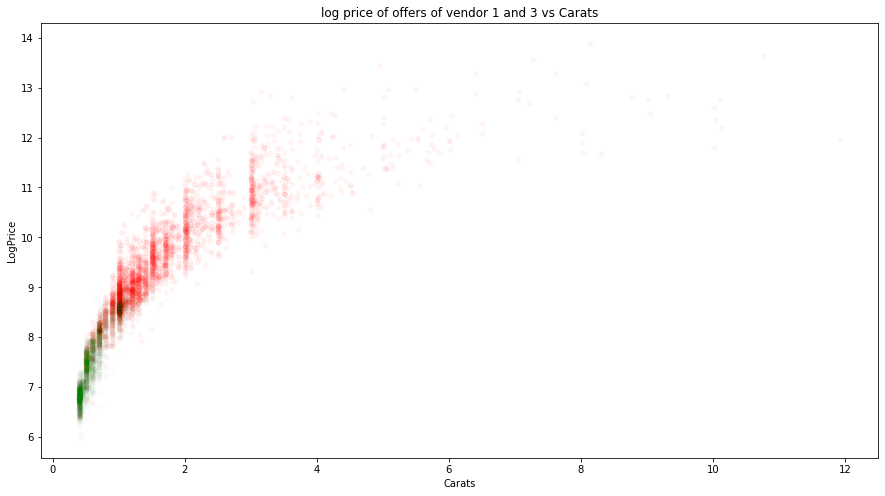

In [8]:
ax = vendor2.plot.scatter(figsize=(15,8), y = 'LogPrice', x = "Carats", color='red', title="log price of offers of vendor 1 and 3 vs Carats", alpha = 0.035)
vendor1.plot.scatter(ax=ax, figsize=(15,8), y = 'LogPrice', x = "Carats", color='green', alpha = 0.01)

Vendor 1 focuses on small carat diamonds.

<AxesSubplot:title={'center':'log price of offers of vendor 3 and 4 vs Carats'}, xlabel='Carats', ylabel='LogPrice'>

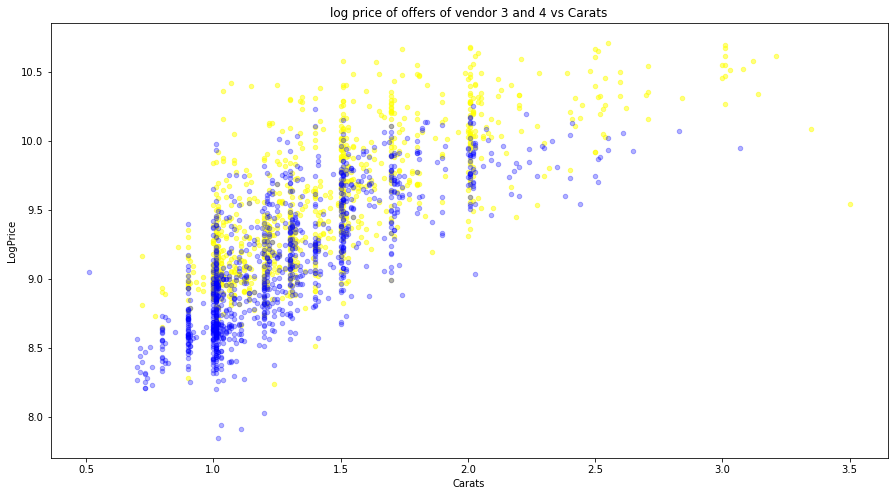

In [9]:
ax = vendor4.plot.scatter(figsize=(15,8), y = 'LogPrice', x = "Carats", color='yellow', title="log price of offers of vendor 3 and 4 vs Carats", alpha = 0.5)
vendor3.plot.scatter(ax=ax, figsize=(15,8), y = 'LogPrice', x = "Carats", color='blue', alpha = 0.3)

<AxesSubplot:xlabel='Carats', ylabel='LogPrice'>

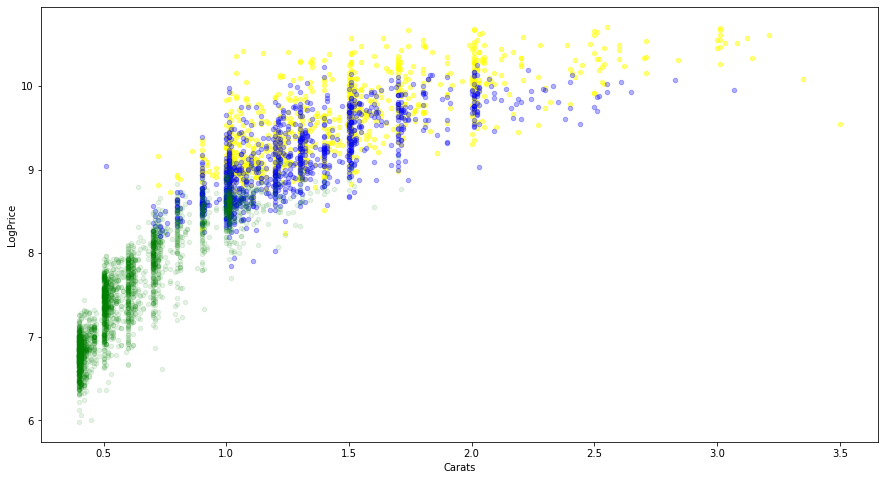

In [10]:
ax = vendor4.plot.scatter(figsize=(15,8), y = 'LogPrice', x = "Carats", color='yellow', alpha = 0.5)
vendor3.plot.scatter(ax=ax, figsize=(15,8), y = 'LogPrice', x = "Carats", color='blue', alpha = 0.3)
vendor1.plot.scatter(ax=ax, figsize=(15,8), y = 'LogPrice', x = "Carats", color='green', alpha = 0.1)

Vendors 3 and 4 are competitors in the same range of carats. Vendor 3 sells cheaper diamonds per carat on aggregate than vendor 4.

Vendor one has slight overlap with Vendors 3 and 4, but sells significantly cheaper diamonds per carat on aggregate.

<AxesSubplot:title={'center':'log price of offers of vendor 3 and 4 vs Depth'}, xlabel='Depth', ylabel='LogPrice'>

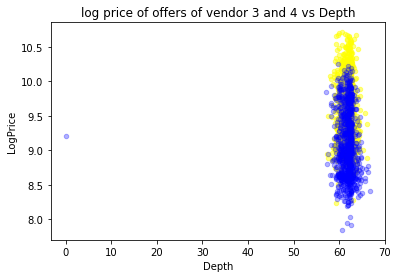

In [11]:
ax = vendor4.plot.scatter(y = 'LogPrice', x = "Depth", color='yellow', title="log price of offers of vendor 3 and 4 vs Depth", alpha = 0.5)
vendor3.plot.scatter(ax=ax, y = 'LogPrice', x = "Depth", color='blue', alpha = 0.3)

<AxesSubplot:title={'center':'log price of offers of vendor 3 and 4 vs Table'}, xlabel='Table', ylabel='LogPrice'>

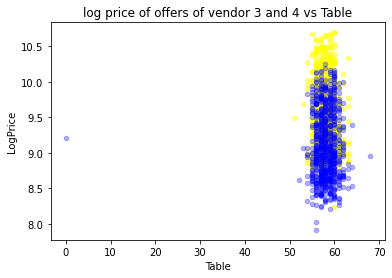

In [12]:
ax = vendor4.plot.scatter(y = 'LogPrice', x = "Table", color='yellow', title="log price of offers of vendor 3 and 4 vs Table", alpha = 0.5)
vendor3.plot.scatter(ax=ax, y = 'LogPrice', x = "Table", color='blue', alpha = 0.3)

<AxesSubplot:title={'center':'log price of offers of vendor 3 and 4 vs Clarity'}, xlabel='Clarity', ylabel='LogPrice'>

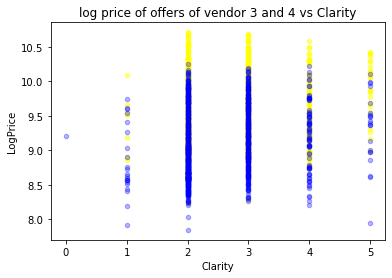

In [13]:
ax = vendor4.plot.scatter(y = 'LogPrice', x = "Clarity", color='yellow', title="log price of offers of vendor 3 and 4 vs Clarity", alpha = 0.5)
vendor3.plot.scatter(ax=ax, y = 'LogPrice', x = "Clarity", color='blue', alpha = 0.3)

<AxesSubplot:title={'center':'log price of offers of vendor 3 and 4 vs Flourescence'}, xlabel='Fluroescence', ylabel='LogPrice'>

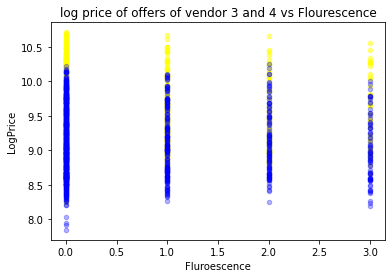

In [14]:
ax = vendor4.plot.scatter(y = 'LogPrice', x = "Fluroescence", color='yellow',  title="log price of offers of vendor 3 and 4 vs Flourescence",alpha = 0.5)
vendor3.plot.scatter(ax=ax, y = 'LogPrice', x = "Fluroescence", color='blue', alpha = 0.3)

Volume of diamonds are compared later below.

There seems to be no significant differences in diamond features between vendor 3 and vendor 4.

Thus, the current conclusion is that vendor 4 just charges more for the same diamond.
____________________________________________________________________________________________________________________________

In [15]:
#dummy encoding for categoricals
def process_categorical_features(df): 
    dummies_Cert = pd.get_dummies(df.Cert, prefix="Cert", drop_first=True) 
    dummies_Regions = pd.get_dummies(df.Regions, prefix="Regions", drop_first=True) 
    dummies_Shape = pd.get_dummies(df.Shape, prefix="Shape", drop_first=True) 
    dummies_Vendor = pd.get_dummies(df.Vendor, prefix="Vendor", drop_first=True) 
    
    df.drop(["Cert", "Regions", "Shape", "Vendor"], axis=1, inplace=True) 
    return pd.concat([df, dummies_Cert, dummies_Regions, dummies_Shape, dummies_Vendor], axis=1) 

df = process_categorical_features(df)

In [16]:
#change 'measurements' column to individual columns per dimension, and with a volume column

df['Measurements'] = df['Measurements'].str.replace(r'[^\d.]+', 'x')

temp = df.Measurements.apply(lambda x: pd.Series((x).split("x")))
df['Measurements1'] = temp[0]
df['Measurements2'] = temp[1]
df['Measurements3'] = temp[2]

df['Measurements1'] = (df['Measurements1']).astype(float)
df['Measurements2'] = (df['Measurements2']).astype(float)
df['Measurements3'] = (df['Measurements3']).astype(float)
df['Volume'] = df['Measurements1'] * df['Measurements2'] * df['Measurements3']
del df['Measurements']

'''
#create CaratsTenth feature
number_dec = df.Carats-df.Carats.astype(int)
temp = number_dec * 10
df['CaratsTenth'] = number_dec = temp.apply(np.floor)
df['CaratsTenth'] = df.CaratsTenth.astype(int)
df.Carats = df.Carats.astype(float)
'''




<ipython-input-16-2899415b9879>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Measurements'] = df['Measurements'].str.replace(r'[^\d.]+', 'x')


"\n#create CaratsTenth feature\nnumber_dec = df.Carats-df.Carats.astype(int)\ntemp = number_dec * 10\ndf['CaratsTenth'] = number_dec = temp.apply(np.floor)\ndf['CaratsTenth'] = df.CaratsTenth.astype(int)\ndf.Carats = df.Carats.astype(float)\n"

<AxesSubplot:title={'center':'log price of offers of vendor 3 and 4 vs Volume'}, xlabel='Volume', ylabel='LogPrice'>

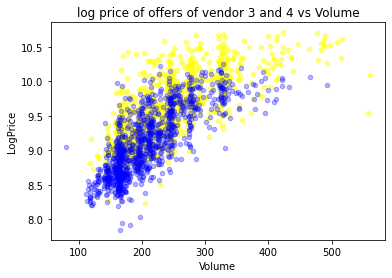

In [17]:
vendor3 = df[df['Vendor_3'] == 1]
vendor4 = df[df['Vendor_4'] == 1]
ax = vendor4.plot.scatter(y = 'LogPrice', x = "Volume", color='yellow', title="log price of offers of vendor 3 and 4 vs Volume", alpha = 0.5)
vendor3.plot.scatter(ax=ax, y = 'LogPrice', x = "Volume", color='blue', alpha = 0.3)

In [18]:
df

,Carats,Clarity,Color,Cut,Depth,Fluroescence,Polish,Symmetry,Table,Price,...,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_2,Vendor_3,Vendor_4,Measurements1,Measurements2,Measurements3,Volume
0,0.41,2,0.0,0,65.4,0,3,2,NaN,$ 430,...,0,0,0,0,0,0,4.65,4.62,3.03,65.093490
1,0.42,2,0.0,0,61.7,3,4,3,NaN,$ 560,...,0,0,0,0,0,0,4.85,4.79,2.98,69.229870
2,0.40,2,0.0,0,64.0,0,4,4,57.0,$ 560,...,0,1,0,0,0,0,4.66,4.63,2.97,64.080126
3,0.41,2,0.0,0,62.7,3,3,3,58.0,$ 560,...,0,1,0,0,0,0,4.71,4.69,2.95,65.165205
4,0.40,2,0.0,0,63.0,0,4,3,58.0,$ 580,...,0,1,0,0,0,0,4.71,4.68,2.96,65.246688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,3.51,3,8.0,4,61.3,2,4,4,56.0,"$ 201,685",...,0,1,0,1,0,0,9.75,9.82,6.03,577.342350
8046,3.51,2,4.0,4,62.3,2,4,4,56.0,"$ 53,355",...,0,1,0,1,0,0,9.72,9.78,6.07,577.023912
8047,7.62,5,4.0,4,NaN,1,4,4,NaN,"$ 586,790",...,0,1,0,1,0,0,12.60,12.68,7.74,1236.604320
8048,1.49,3,1.0,3,NaN,0,2,2,57.0,"$ 9,490",...,0,1,0,0,1,0,7.22,7.34,4.53,240.066444


In [19]:
#change these columns to numeric
df['Price'] = df['Price'].str.replace(r'[^\d.]+', '')
df['Price'] = (df['Price']).astype(float)
df['Retail'] = df['Retail'].str.replace(r'[^\d.]+', '')
df['Retail'] = (df['Retail']).astype(float)

#logprice and logretail are already floats


<ipython-input-19-5978f9edd351>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Price'] = df['Price'].str.replace(r'[^\d.]+', '')
<ipython-input-19-5978f9edd351>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Retail'] = df['Retail'].str.replace(r'[^\d.]+', '')


In [20]:
#TESTER 
#get rid of retail as we don't need it now
trainingRetail = df.Retail
del df['Retail']
trainingLogPrice = df.LogPrice
del df['LogPrice']
trainingLogRetail = df.LogRetail
del df['LogRetail']

In [21]:
trainingDF = df

In [22]:
trainingDF

,Carats,Clarity,Color,Cut,Depth,Fluroescence,Polish,Symmetry,Table,Price,...,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_2,Vendor_3,Vendor_4,Measurements1,Measurements2,Measurements3,Volume
0,0.41,2,0.0,0,65.4,0,3,2,NaN,430.0,...,0,0,0,0,0,0,4.65,4.62,3.03,65.093490
1,0.42,2,0.0,0,61.7,3,4,3,NaN,560.0,...,0,0,0,0,0,0,4.85,4.79,2.98,69.229870
2,0.40,2,0.0,0,64.0,0,4,4,57.0,560.0,...,0,1,0,0,0,0,4.66,4.63,2.97,64.080126
3,0.41,2,0.0,0,62.7,3,3,3,58.0,560.0,...,0,1,0,0,0,0,4.71,4.69,2.95,65.165205
4,0.40,2,0.0,0,63.0,0,4,3,58.0,580.0,...,0,1,0,0,0,0,4.71,4.68,2.96,65.246688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,3.51,3,8.0,4,61.3,2,4,4,56.0,201685.0,...,0,1,0,1,0,0,9.75,9.82,6.03,577.342350
8046,3.51,2,4.0,4,62.3,2,4,4,56.0,53355.0,...,0,1,0,1,0,0,9.72,9.78,6.07,577.023912
8047,7.62,5,4.0,4,NaN,1,4,4,NaN,586790.0,...,0,1,0,1,0,0,12.60,12.68,7.74,1236.604320
8048,1.49,3,1.0,3,NaN,0,2,2,57.0,9490.0,...,0,1,0,0,1,0,7.22,7.34,4.53,240.066444


#### feature engineering with offers.csv

In [23]:
df = pd.read_csv('offers.csv')

del df['id']
del df['Offers']

#scalar for Clarity
df.loc[df.Clarity == "FL", "Clarity"] = 6
df.loc[df.Clarity == "IF", "Clarity"] = 5
df.loc[df.Clarity == "VVS1", "Clarity"] = 4
df.loc[df.Clarity == "VVS2", "Clarity"] = 4
df.loc[df.Clarity == "VS1", "Clarity"] = 3
df.loc[df.Clarity == "VS2", "Clarity"] = 3
df.loc[df.Clarity == "SI1", "Clarity"] = 2
df.loc[df.Clarity == "SI2", "Clarity"] = 2
df.loc[df.Clarity == "SI3", "Clarity"] = 2
df.loc[df.Clarity == "I1", "Clarity"] = 1
df.loc[df.Clarity == "I2", "Clarity"] = 1
df.loc[df.Clarity == "I3", "Clarity"] = 1
df.loc[df.Clarity == "N", "Clarity"] = 0
df.loc[df.Clarity == "None", "Clarity"] = 0
df.Clarity = df.Clarity.astype(int)

#scalar for color:
df.loc[df.Color == "D", "Color"] = 8
df.loc[df.Color == "E", "Color"] = 7
df.loc[df['Color'].astype(str).str[0] == "F", "Color"] = 6
df.loc[df.Color == "G", "Color"] = 5
df.loc[df.Color == "H", "Color"] = 4
df.loc[df.Color == "I", "Color"] = 3
df.loc[df.Color == "J", "Color"] = 2
df.loc[df.Color == "K", "Color"] = 1
df['Color'] = (
    pd.to_numeric(df['Color'],
                  errors='coerce')
      .fillna(0)
    )

#scalar for Cut
df.loc[df.Cut == "Ideal", "Cut"] = 5
df.loc[df.Cut == "Excellent", "Cut"] = 4
df.loc[df.Cut == "Very good", "Cut"] = 3
df.loc[df.Cut == "Good", "Cut"] = 2
df.loc[df.Cut == "Fair", "Cut"] = 1
df.loc[df.Cut == " ", "Cut"] = 0
df.Cut = df.Cut.astype(int)

#scalar for Fluroescence
df.loc[df.Fluroescence == "Very Stro..", "Fluroescence"] = 3
df.loc[df.Fluroescence == "Strong", "Fluroescence"] = 3
df.loc[df.Fluroescence == "Strong Bl..", "Fluroescence"] = 3
df.loc[df.Fluroescence == "Strong B", "Fluroescence"] = 3

df.loc[df.Fluroescence == "Medium Bl..", "Fluroescence"] = 2
df.loc[df.Fluroescence == "Medium", "Fluroescence"] = 2
df.loc[df.Fluroescence == "Medium Ye..", "Fluroescence"] = 2
df.loc[df.Fluroescence == "Medium B", "Fluroescence"] = 2

df.loc[df.Fluroescence == "Faint", "Fluroescence"] = 1
df.loc[df.Fluroescence == "Very Smal..", "Fluroescence"] = 1
df.loc[df.Fluroescence == "Faint Y", "Fluroescence"] = 1

df.loc[df.Fluroescence == "None", "Fluroescence"] = 0
df.loc[df.Fluroescence == ' ', "Fluroescence"] = 0
df.Fluroescence = df.Fluroescence.fillna(0)

df.Known_Conflict_Diamond = pd.Categorical(df.Known_Conflict_Diamond)
df['Known_Conflict_Diamond_Code'] = df.Known_Conflict_Diamond.cat.codes
del df['Known_Conflict_Diamond']

#scalar for Polish
df.loc[df.Polish == "Excellent", "Polish"] = 4
df.loc[df.Polish == "Very good", "Polish"] = 3
df.loc[df.Polish == "Good", "Polish"] = 2
df.loc[df.Polish == "Fair", "Polish"] = 1
df.loc[df.Polish == " ", "Polish"] = 0
df.Polish = df.Polish.astype(int)

df.loc[df.Shape == "Oval ", "Shape"] = "Oval"
df.loc[df.Shape == "ROUND", "Shape"] = "Round"

#scalar for Symmetry
df.loc[df.Symmetry == "Excellent", "Symmetry"] = 4
df.loc[df.Symmetry == "Execllent", "Symmetry"] = 4
df.loc[df.Symmetry == "Very good", "Symmetry"] = 3
df.loc[df.Symmetry == "Good", "Symmetry"] = 2
df.loc[df.Symmetry == "Fair", "Symmetry"] = 1
df.loc[df.Symmetry == "Faint", "Symmetry"] = 0
df.loc[df.Symmetry == " ", "Symmetry"] = 0
df.Symmetry = df.Symmetry.astype(int)



In [24]:
#dummy encoding for categoricals
def process_categorical_features(df): 
    dummies_Cert = pd.get_dummies(df.Cert, prefix="Cert", drop_first=True) 
    dummies_Regions = pd.get_dummies(df.Regions, prefix="Regions", drop_first=True) 
    dummies_Shape = pd.get_dummies(df.Shape, prefix="Shape", drop_first=True) 
    dummies_Vendor = pd.get_dummies(df.Vendor, prefix="Vendor", drop_first=True) 
    
    df.drop(["Cert", "Regions", "Shape", "Vendor"], axis=1, inplace=True) 
    return pd.concat([df, dummies_Cert, dummies_Regions, dummies_Shape, dummies_Vendor], axis=1) 

df = process_categorical_features(df)

In [25]:
#change 'measurements' column to individual columns per dimension, and with a volume column

df['Measurements'] = df['Measurements'].str.replace(r'[^\d.]+', 'x')

temp = df.Measurements.apply(lambda x: pd.Series((x).split("x")))
df['Measurements1'] = temp[0]
df['Measurements2'] = temp[1]
df['Measurements3'] = temp[2]

df['Measurements1'] = (df['Measurements1']).astype(float)
df['Measurements2'] = (df['Measurements2']).astype(float)
df['Measurements3'] = (df['Measurements3']).astype(float)
df['Volume'] = df['Measurements1'] * df['Measurements2'] * df['Measurements3']
del df['Measurements']

'''
#create CaratsTenth feature
number_dec = df.Carats-df.Carats.astype(int)
temp = number_dec * 10
df['CaratsTenth'] = number_dec = temp.apply(np.floor)
df['CaratsTenth'] = df.CaratsTenth.astype(int)
df.Carats = df.Carats.astype(float)
'''

<ipython-input-25-8bf5c3a86e81>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Measurements'] = df['Measurements'].str.replace(r'[^\d.]+', 'x')


"\n#create CaratsTenth feature\nnumber_dec = df.Carats-df.Carats.astype(int)\ntemp = number_dec * 10\ndf['CaratsTenth'] = number_dec = temp.apply(np.floor)\ndf['CaratsTenth'] = df.CaratsTenth.astype(int)\ndf.Carats = df.Carats.astype(float)\n"

In [26]:
offersDF = df

#### datasets after feature engineering:

In [27]:
trainingDF.dtypes

Carats                         float64
Clarity                          int32
Color                          float64
Cut                              int32
Depth                          float64
Fluroescence                     int64
Polish                           int32
Symmetry                         int32
Table                          float64
Price                          float64
Known_Conflict_Diamond_Code       int8
Cert_GemEx                       uint8
Regions_Australia                uint8
Regions_Botswana                 uint8
Regions_Canada                   uint8
Regions_DR Congo                 uint8
Regions_Other/Unknown            uint8
Regions_Russia                   uint8
Regions_South Africa             uint8
Regions_Zimbabwe                 uint8
Shape_Cushion                    uint8
Shape_Emerald                    uint8
Shape_Marquis                    uint8
Shape_Marquise                   uint8
Shape_Marwuise                   uint8
Shape_Oval               

In [28]:
offersDF

,Carats,Clarity,Color,Cut,Depth,Fluroescence,Polish,Symmetry,Table,Known_Conflict_Diamond_Code,...,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_2,Vendor_3,Vendor_4,Measurements1,Measurements2,Measurements3,Volume
0,0.42,2,0.0,0,62.7,0,4,4,57.0,-1,...,0,1,0,0,0,0,4.81,4.78,3.01,69.205318
1,0.40,3,0.0,0,63.8,0,4,4,59.0,-1,...,0,1,0,0,0,0,4.64,4.61,2.95,63.101680
2,0.41,2,0.0,0,62.2,0,4,3,58.0,1,...,0,1,0,0,0,0,4.76,4.74,2.95,66.559080
3,0.40,2,1.0,0,64.2,3,3,3,58.0,0,...,0,0,0,0,0,0,4.63,4.59,2.96,62.905032
4,0.40,3,0.0,0,64.3,0,4,3,NaN,0,...,0,1,0,0,0,0,4.67,4.62,2.99,64.510446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,1.65,3,7.0,4,58.4,0,4,4,60.0,-1,...,0,0,0,0,0,1,7.79,7.83,4.56,278.140392
2679,2.35,2,7.0,4,62.1,0,4,4,58.0,1,...,0,1,0,1,0,0,8.48,8.53,5.28,381.925632
2680,2.35,2,2.0,4,NaN,0,4,3,NaN,-1,...,0,0,0,1,0,0,8.64,8.67,5.20,389.525760
2681,5.02,1,2.0,4,59.5,0,4,4,59.0,-1,...,0,0,0,1,0,0,11.16,11.18,6.64,828.464832


________________________________________________________________________________________________________________________
## Model Training

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, STATUS_FAIL

In [30]:
X_train, X_test, y_train, y_test = train_test_split(trainingDF.loc[:, trainingDF.columns != 'Price'], trainingDF.Price, test_size = 0.2, random_state = 0)

In [31]:
train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

In [32]:
#model for master
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
# run XGBoost algorithm with hyperparameters optimization
# this model outperforms the linear regression
from functools import partial
from sklearn.model_selection import KFold

def train_xgb(params, X_train, y_train):    
    n_estimators = int(params["n_estimators"])
    max_depth    = int(params["max_depth"])

    try:
        model = xgb.XGBRegressor(n_estimators=n_estimators, 
                                 max_depth=max_depth, 
                                 learning_rate=params["learning_rate"],
                                 subsample=params["subsample"])

        result = model.fit(X_train, 
                           y_train.values.ravel(),
                           eval_set=[(X_train, y_train.values.ravel())],
                           early_stopping_rounds=50,
                           verbose=False)
        
        cv_space = KFold(n_splits=5, shuffle=True)
        #cv_space = TimeSeriesSplit(n_splits=5)
        #results = cross_val_score(model, X, Y, cv=kfold)
        #cv_space = TimeSeriesSplit(n_splits=5)
        cv_score = cross_val_score(model, 
                                   X_train, 
                                   y_train.values.ravel(), 
                                   cv=cv_space, 
                                   scoring=mape_scorer)

        rmse = np.abs(np.mean(np.array(cv_score)))
        
        #results = cross_val_score(xgb_model, X_test, y_test, cv=cv_space)
        #print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
        
        return {
            "loss": rmse,
            "status": STATUS_OK,
            "model": model
        }
        
    except ValueError as ex:
        return {
            "error": ex,
            "status": STATUS_FAIL
        }



In [34]:
from sklearn.metrics import make_scorer

# MAPE computation
def mape(y, yhat, perc=True):
    n = len(yhat.index) if type(yhat) == pd.Series else len(yhat)    
    mape = []
    for a, f in zip(y, yhat):
        # avoid division by 0
        if f > 1e-9:
            mape.append(np.abs((a - f)/a))
    mape = np.mean(np.array(mape))
    return mape * 100. if perc else mape

mape_scorer = make_scorer(mape, greater_is_better=False)

In [35]:
#run this only when doing hyperparameter optimization, as it will take 20 mins to run.

from sklearn.model_selection import (TimeSeriesSplit, train_test_split, 
                                     cross_val_score)

def optimize_xgb(X_train, y_train, max_evals=10):
    space = {
        "n_estimators": hp.quniform("n_estimators", 100, 1000, 10),
        "max_depth": hp.quniform("max_depth", 1, 8, 1),
        "learning_rate": hp.loguniform("learning_rate", -5, 1),
        "subsample": hp.uniform("subsample", 0.8, 1),
        "gamma": hp.quniform("gamma", 0, 100, 1)
    }

    objective_fn = partial(train_xgb, X_train=X_train, y_train=y_train)
    
    trials = Trials()
    best = fmin(fn=objective_fn,
                space=space,
                algo=tpe.suggest,
                max_evals=max_evals,
                trials=trials)

    # evaluate the best model on the test set
    print(f"""
    Best parameters:
        learning_rate: {best["learning_rate"]} 
        n_estimators: {best["n_estimators"]}
        max_depth: {best["max_depth"]}
        sub_sample: {best["subsample"]}
        gamma: {best["gamma"]}
    """)
    return best, trials

best, trials = optimize_xgb(X_train, y_train, max_evals=10)

100%|████████████████████████████████████████████████| 10/10 [02:59<00:00, 17.96s/trial, best loss: 10.757026856721101]

    Best parameters:
        learning_rate: 0.04050483611593525 
        n_estimators: 840.0
        max_depth: 8.0
        sub_sample: 0.8576671341229406
        gamma: 42.0
    


In [36]:

# evaluate the best model on the test set. this takes 15 seconds.
res = train_xgb(best, X_test, y_test)
xgb_model = res["model"]
predictions = xgb_model.predict(X_test)
cv_score = min([f["loss"] for f in trials.results if f["status"] == STATUS_OK])
mape_score = mape(y_test.values, predictions)

print(f"Root mean square error cross-validation/MAPE score: {cv_score:.4f} / {mape_score:.4f}")

Root mean square error cross-validation/MAPE score: 10.7570 / 0.6668


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state = 2)
results = cross_val_score(xgb_model, X_test, y_test, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 85.45% (15.71%)


In [38]:
#xgb_model.save_model("MAPE01257.model")

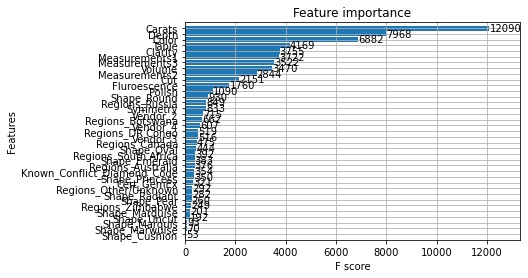

In [39]:
from xgboost import plot_importance, plot_tree
_ = plot_importance(xgb_model, height=0.9)

## Predict price for offers.csv

In [40]:
predictions2 = xgb_model.predict(offersDF)

In [41]:
offersDF

,Carats,Clarity,Color,Cut,Depth,Fluroescence,Polish,Symmetry,Table,Known_Conflict_Diamond_Code,...,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_2,Vendor_3,Vendor_4,Measurements1,Measurements2,Measurements3,Volume
0,0.42,2,0.0,0,62.7,0,4,4,57.0,-1,...,0,1,0,0,0,0,4.81,4.78,3.01,69.205318
1,0.40,3,0.0,0,63.8,0,4,4,59.0,-1,...,0,1,0,0,0,0,4.64,4.61,2.95,63.101680
2,0.41,2,0.0,0,62.2,0,4,3,58.0,1,...,0,1,0,0,0,0,4.76,4.74,2.95,66.559080
3,0.40,2,1.0,0,64.2,3,3,3,58.0,0,...,0,0,0,0,0,0,4.63,4.59,2.96,62.905032
4,0.40,3,0.0,0,64.3,0,4,3,NaN,0,...,0,1,0,0,0,0,4.67,4.62,2.99,64.510446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,1.65,3,7.0,4,58.4,0,4,4,60.0,-1,...,0,0,0,0,0,1,7.79,7.83,4.56,278.140392
2679,2.35,2,7.0,4,62.1,0,4,4,58.0,1,...,0,1,0,1,0,0,8.48,8.53,5.28,381.925632
2680,2.35,2,2.0,4,NaN,0,4,3,NaN,-1,...,0,0,0,1,0,0,8.64,8.67,5.20,389.525760
2681,5.02,1,2.0,4,59.5,0,4,4,59.0,-1,...,0,0,0,1,0,0,11.16,11.18,6.64,828.464832


In [42]:
offersDF["Price"] = predictions2
offersDF["PriceLN"] = np.log(offersDF.Price)

In [43]:
offersDF

,Carats,Clarity,Color,Cut,Depth,Fluroescence,Polish,Symmetry,Table,Known_Conflict_Diamond_Code,...,Shape_Uncut,Vendor_2,Vendor_3,Vendor_4,Measurements1,Measurements2,Measurements3,Volume,Price,PriceLN
0,0.42,2,0.0,0,62.7,0,4,4,57.0,-1,...,0,0,0,0,4.81,4.78,3.01,69.205318,574.916809,6.354225
1,0.40,3,0.0,0,63.8,0,4,4,59.0,-1,...,0,0,0,0,4.64,4.61,2.95,63.101680,739.120178,6.605461
2,0.41,2,0.0,0,62.2,0,4,3,58.0,1,...,0,0,0,0,4.76,4.74,2.95,66.559080,553.740417,6.316696
3,0.40,2,1.0,0,64.2,3,3,3,58.0,0,...,0,0,0,0,4.63,4.59,2.96,62.905032,691.908752,6.539454
4,0.40,3,0.0,0,64.3,0,4,3,NaN,0,...,0,0,0,0,4.67,4.62,2.99,64.510446,711.119324,6.566840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,1.65,3,7.0,4,58.4,0,4,4,60.0,-1,...,0,0,0,1,7.79,7.83,4.56,278.140392,33898.625000,10.431129
2679,2.35,2,7.0,4,62.1,0,4,4,58.0,1,...,0,1,0,0,8.48,8.53,5.28,381.925632,37328.753906,10.527519
2680,2.35,2,2.0,4,NaN,0,4,3,NaN,-1,...,0,1,0,0,8.64,8.67,5.20,389.525760,24561.804688,10.108948
2681,5.02,1,2.0,4,59.5,0,4,4,59.0,-1,...,0,1,0,0,11.16,11.18,6.64,828.464832,98471.507812,11.497522


In [44]:
trainingDF['PriceLN'] = trainingLogPrice

In [45]:
trainingDF

,Carats,Clarity,Color,Cut,Depth,Fluroescence,Polish,Symmetry,Table,Price,...,Shape_Round,Shape_Uncut,Vendor_2,Vendor_3,Vendor_4,Measurements1,Measurements2,Measurements3,Volume,PriceLN
0,0.41,2,0.0,0,65.4,0,3,2,NaN,430.0,...,0,0,0,0,0,4.65,4.62,3.03,65.093490,6.063785
1,0.42,2,0.0,0,61.7,3,4,3,NaN,560.0,...,0,0,0,0,0,4.85,4.79,2.98,69.229870,6.327937
2,0.40,2,0.0,0,64.0,0,4,4,57.0,560.0,...,1,0,0,0,0,4.66,4.63,2.97,64.080126,6.327937
3,0.41,2,0.0,0,62.7,3,3,3,58.0,560.0,...,1,0,0,0,0,4.71,4.69,2.95,65.165205,6.327937
4,0.40,2,0.0,0,63.0,0,4,3,58.0,580.0,...,1,0,0,0,0,4.71,4.68,2.96,65.246688,6.363028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,3.51,3,8.0,4,61.3,2,4,4,56.0,201685.0,...,1,0,1,0,0,9.75,9.82,6.03,577.342350,12.214462
8046,3.51,2,4.0,4,62.3,2,4,4,56.0,53355.0,...,1,0,1,0,0,9.72,9.78,6.07,577.023912,10.884723
8047,7.62,5,4.0,4,NaN,1,4,4,NaN,586790.0,...,1,0,1,0,0,12.60,12.68,7.74,1236.604320,13.282422
8048,1.49,3,1.0,3,NaN,0,2,2,57.0,9490.0,...,1,0,0,1,0,7.22,7.34,4.53,240.066444,9.157994


## Visualizing predicted values

<AxesSubplot:title={'center':'price vs carats'}, xlabel='Carats', ylabel='Price'>

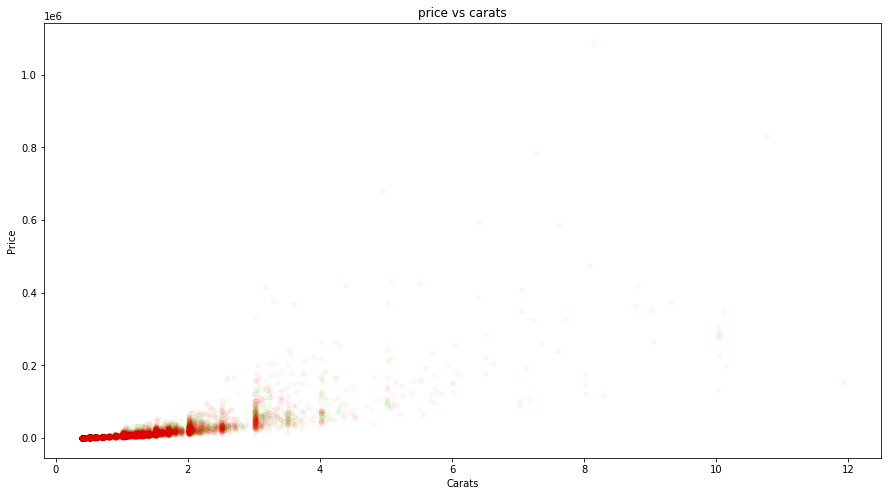

In [46]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'Price', x="Carats", title="price vs carats", color='lime', alpha = 0.05)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'Price', x = "Carats", color='r', alpha = 0.03)

<AxesSubplot:title={'center':'log price vs carats'}, xlabel='Carats', ylabel='PriceLN'>

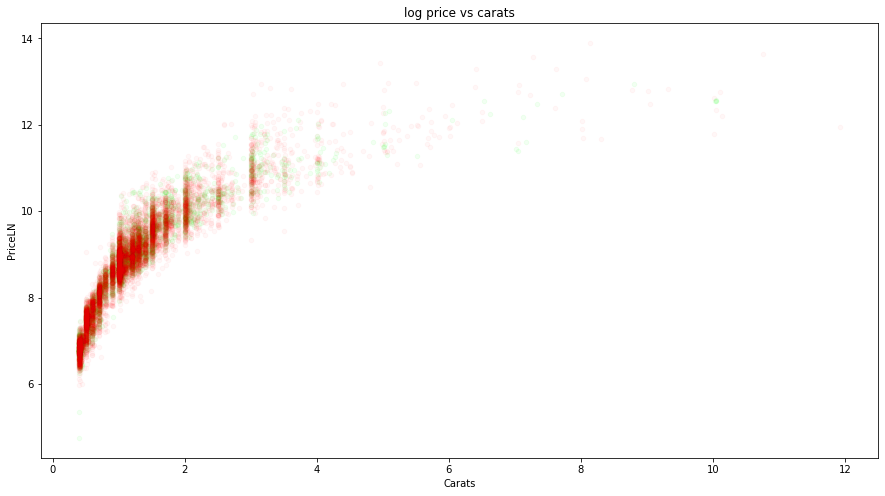

In [47]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'PriceLN', x="Carats", title="log price vs carats", color='lime', alpha = 0.05)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'PriceLN', x = "Carats", color='r', alpha = 0.03)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log price vs depth'}, xlabel='Depth', ylabel='PriceLN'>

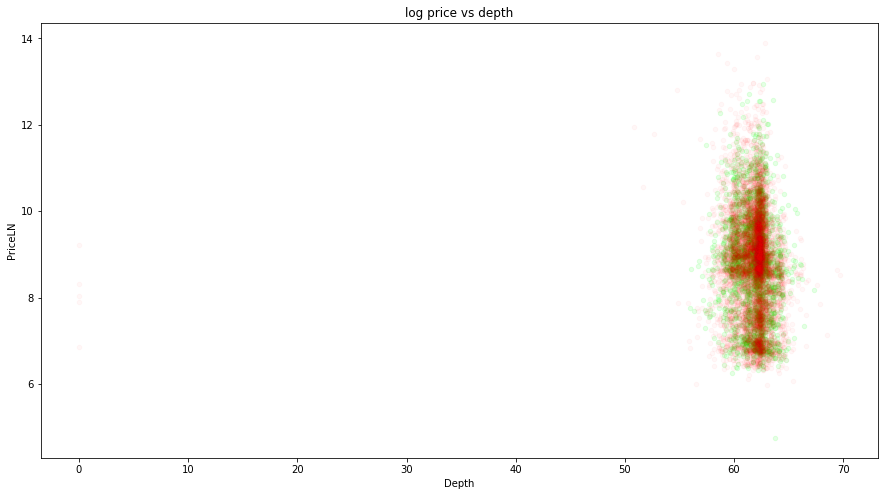

In [48]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'PriceLN', x="Depth", title="log price vs depth", color='lime', alpha = 0.1)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'PriceLN', x = "Depth", color='red', alpha = 0.03)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log price vs known conflict diamond boolean'}, xlabel='Known_Conflict_Diamond_Code', ylabel='PriceLN'>

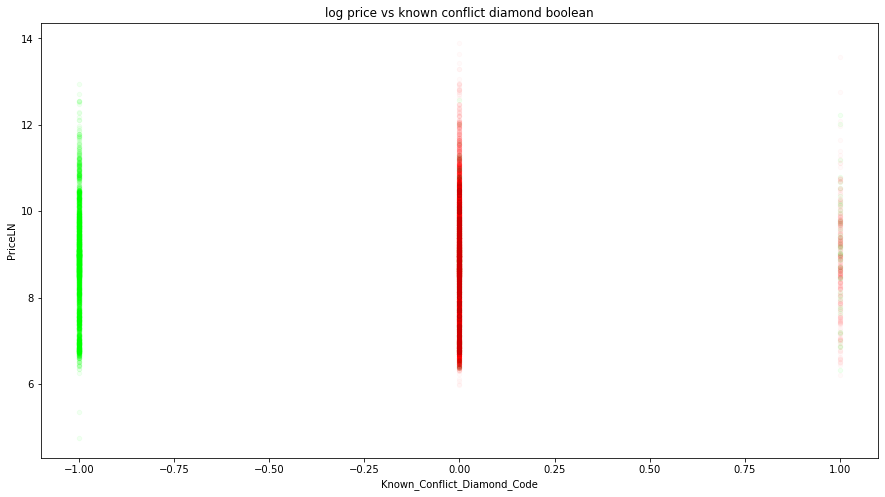

In [49]:
ax = offersDF.plot.scatter(figsize=(15,8), y = 'PriceLN', x="Known_Conflict_Diamond_Code", title="log price vs known conflict diamond boolean", color='lime', alpha = 0.05)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'PriceLN', x = "Known_Conflict_Diamond_Code", color='r', alpha = 0.02)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log price vs color'}, xlabel='Color', ylabel='PriceLN'>

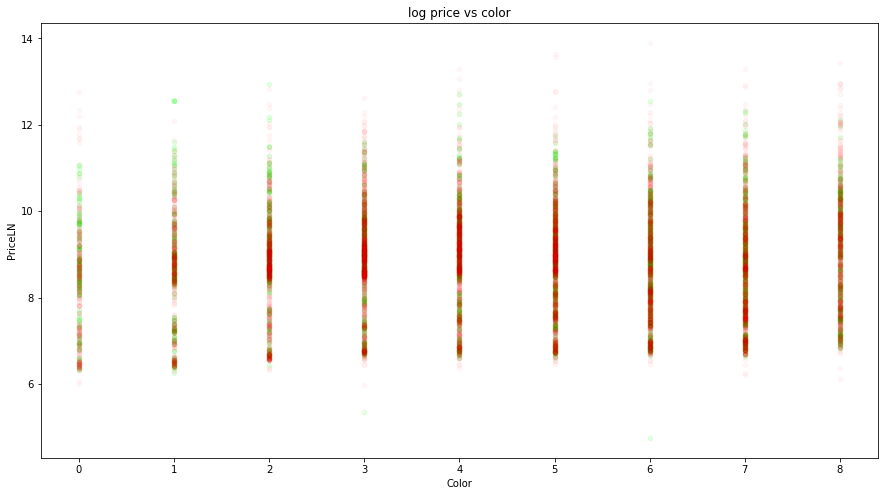

In [50]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'PriceLN', x="Color", title="log price vs color", color='lime', alpha = 0.1)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'PriceLN', x = "Color", color='red', alpha = 0.03)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log price vs Table'}, xlabel='Table', ylabel='PriceLN'>

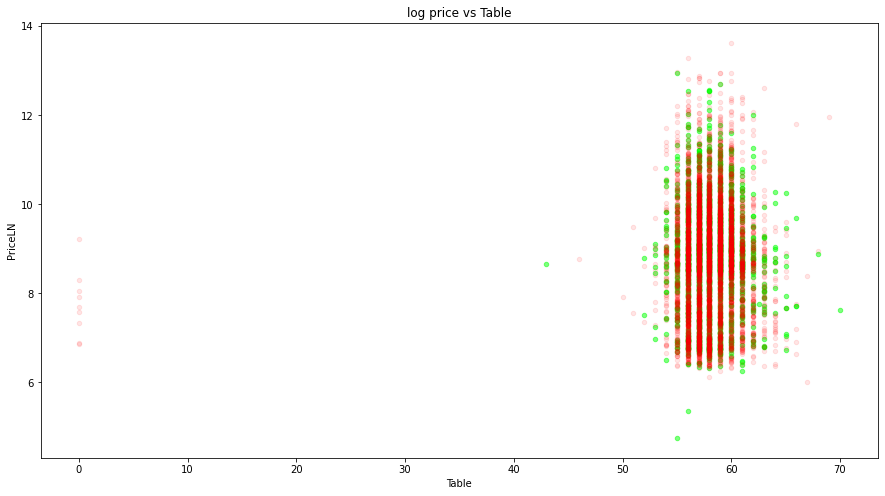

In [51]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'PriceLN', x="Table", title="log price vs Table", color='lime', alpha = 0.5)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'PriceLN', x = "Table", color='red', alpha = 0.1)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log price vs Volume'}, xlabel='Volume', ylabel='PriceLN'>

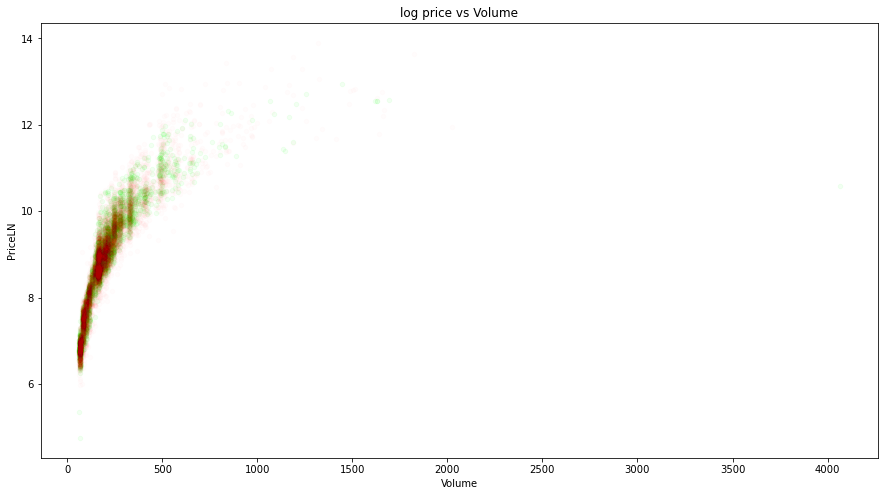

In [52]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'PriceLN', x="Volume", title="log price vs Volume", color='lime', alpha = 0.05)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'PriceLN', x = "Volume", color='red', alpha = 0.01)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log price vs Measurements1'}, xlabel='Measurements1', ylabel='PriceLN'>

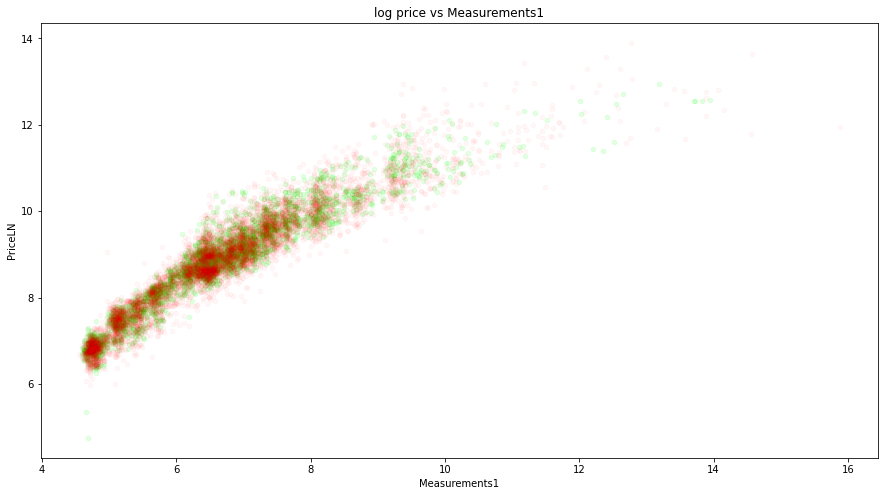

In [53]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'PriceLN', x="Measurements1", title="log price vs Measurements1", color='lime', alpha = 0.1)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'PriceLN', x = "Measurements1", color='red', alpha = 0.03)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log price vs Measurements2'}, xlabel='Measurements2', ylabel='PriceLN'>

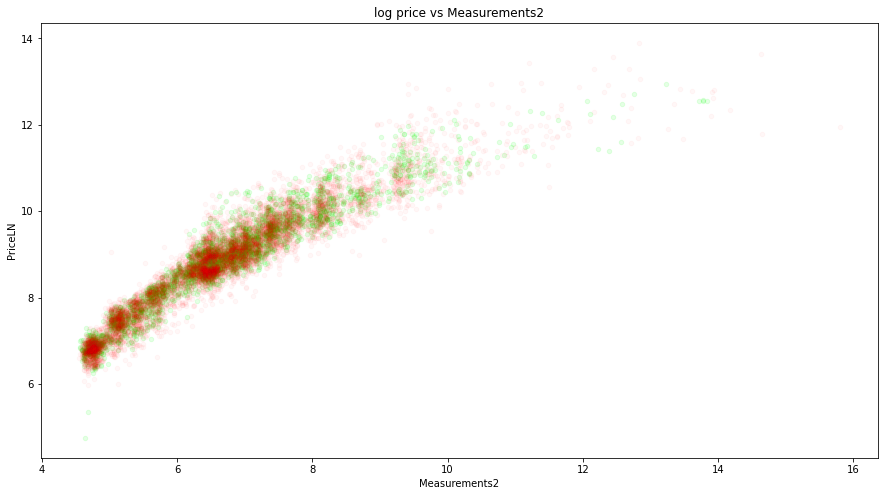

In [54]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'PriceLN', x="Measurements2", title="log price vs Measurements2", color='lime', alpha = 0.1)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'PriceLN', x = "Measurements2", color='red', alpha = 0.03)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log price vs Measurements3'}, xlabel='Measurements3', ylabel='PriceLN'>

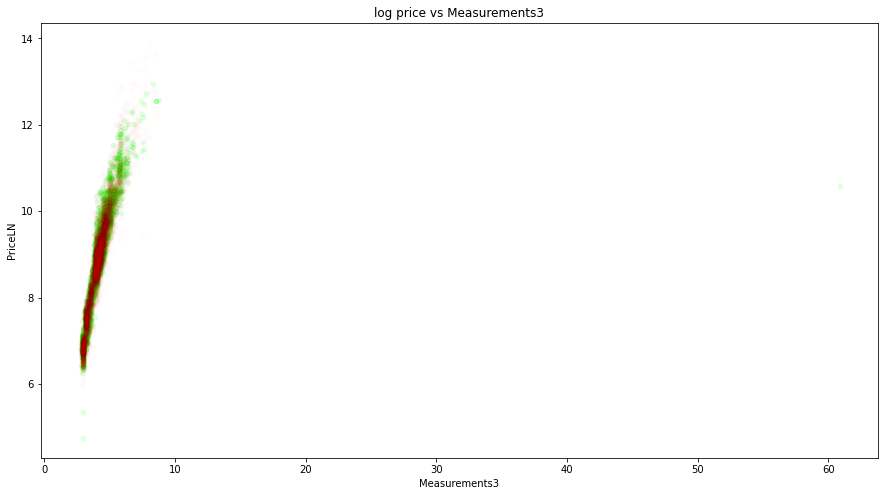

In [55]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'PriceLN', x="Measurements3", title="log price vs Measurements3", color='lime', alpha = 0.1)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'PriceLN', x = "Measurements3", color='red', alpha = 0.01)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

_____________________________________________________________________________________________________________________

In [56]:
#remove the log columns for this next step:
del trainingDF['PriceLN']
del offersDF["PriceLN"] 

#reposition Price column to last column in training.csv for matching features during prediction:
trainingPrice = trainingDF.Price
del trainingDF['Price']
trainingDF['Price'] = trainingPrice

## To find out how much I should offer:
## Train training.csv again with Retail and Predict Retail (Offer) in offers.csv

In [57]:
#add retail column to training.csv
trainingDF['Retail'] = trainingRetail

In [58]:
trainingDF

,Carats,Clarity,Color,Cut,Depth,Fluroescence,Polish,Symmetry,Table,Known_Conflict_Diamond_Code,...,Shape_Uncut,Vendor_2,Vendor_3,Vendor_4,Measurements1,Measurements2,Measurements3,Volume,Price,Retail
0,0.41,2,0.0,0,65.4,0,3,2,NaN,0,...,0,0,0,0,4.65,4.62,3.03,65.093490,430.0,850.0
1,0.42,2,0.0,0,61.7,3,4,3,NaN,0,...,0,0,0,0,4.85,4.79,2.98,69.229870,560.0,920.0
2,0.40,2,0.0,0,64.0,0,4,4,57.0,0,...,0,0,0,0,4.66,4.63,2.97,64.080126,560.0,575.0
3,0.41,2,0.0,0,62.7,3,3,3,58.0,0,...,0,0,0,0,4.71,4.69,2.95,65.165205,560.0,825.0
4,0.40,2,0.0,0,63.0,0,4,3,58.0,0,...,0,0,0,0,4.71,4.68,2.96,65.246688,580.0,890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,3.51,3,8.0,4,61.3,2,4,4,56.0,0,...,0,1,0,0,9.75,9.82,6.03,577.342350,201685.0,299320.0
8046,3.51,2,4.0,4,62.3,2,4,4,56.0,0,...,0,1,0,0,9.72,9.78,6.07,577.023912,53355.0,85110.0
8047,7.62,5,4.0,4,NaN,1,4,4,NaN,0,...,0,1,0,0,12.60,12.68,7.74,1236.604320,586790.0,842730.0
8048,1.49,3,1.0,3,NaN,0,2,2,57.0,0,...,0,0,1,0,7.22,7.34,4.53,240.066444,9490.0,14775.0


### Model Training

In [59]:
X_train, X_test, y_train, y_test = train_test_split(trainingDF.loc[:, trainingDF.columns != 'Retail'], trainingDF.Retail, test_size = 0.2, random_state = 0)

In [60]:
train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

In [61]:
#model for master
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
#optimize
best, trials = optimize_xgb(X_train, y_train, max_evals=10)

 40%|███████████████████▌                             | 4/10 [00:43<01:15, 12.63s/trial, best loss: 11.367291555462534]

C:\Users\Mark\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,

C:\Users\Mark\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)

C:\Users\Mark\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,

C:\Users\Mark\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)

C:\Users\Mark\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,

C:\Users\Mark\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)

C:\User

 50%|████████████████████████▌                        | 5/10 [00:49<00:50, 10.06s/trial, best loss: 11.367291555462534]

C:\Users\Mark\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,

C:\Users\Mark\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



100%|█████████████████████████████████████████████████| 10/10 [01:41<00:00, 10.18s/trial, best loss: 11.17492817314966]

    Best parameters:
        learning_rate: 0.14840705202399018 
        n_estimators: 420.0
        max_depth: 7.0
        sub_sample: 0.922296444831477
        gamma: 44.0
    


In [63]:
# evaluate the best model on the test set. this takes 15 seconds.
res = train_xgb(best, X_test, y_test)
xgb_model = res["model"]
predictions = xgb_model.predict(X_test)
cv_score = min([f["loss"] for f in trials.results if f["status"] == STATUS_OK])
mape_score = mape(y_test.values, predictions)

print(f"Root mean square error cross-validation/MAPE score: {cv_score:.4f} / {mape_score:.4f}")

Root mean square error cross-validation/MAPE score: 11.1749 / 0.1816


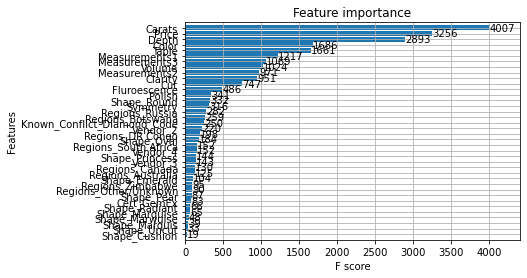

In [64]:
from xgboost import plot_importance, plot_tree
_ = plot_importance(xgb_model, height=0.9)

In [65]:
predictions3 = xgb_model.predict(offersDF)

In [66]:
offersDF["Retail"] = predictions3
offersDF["RetailLN"] = np.log(offersDF.Retail)

In [67]:
offersDF

,Carats,Clarity,Color,Cut,Depth,Fluroescence,Polish,Symmetry,Table,Known_Conflict_Diamond_Code,...,Vendor_2,Vendor_3,Vendor_4,Measurements1,Measurements2,Measurements3,Volume,Price,Retail,RetailLN
0,0.42,2,0.0,0,62.7,0,4,4,57.0,-1,...,0,0,0,4.81,4.78,3.01,69.205318,574.916809,982.411316,6.890010
1,0.40,3,0.0,0,63.8,0,4,4,59.0,-1,...,0,0,0,4.64,4.61,2.95,63.101680,739.120178,1235.648926,7.119351
2,0.41,2,0.0,0,62.2,0,4,3,58.0,1,...,0,0,0,4.76,4.74,2.95,66.559080,553.740417,99.519760,4.600356
3,0.40,2,1.0,0,64.2,3,3,3,58.0,0,...,0,0,0,4.63,4.59,2.96,62.905032,691.908752,1125.200317,7.025716
4,0.40,3,0.0,0,64.3,0,4,3,NaN,0,...,0,0,0,4.67,4.62,2.99,64.510446,711.119324,1007.576904,6.915304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,1.65,3,7.0,4,58.4,0,4,4,60.0,-1,...,0,0,1,7.79,7.83,4.56,278.140392,33898.625000,44466.507812,10.702492
2679,2.35,2,7.0,4,62.1,0,4,4,58.0,1,...,1,0,0,8.48,8.53,5.28,381.925632,37328.753906,10455.097656,9.254845
2680,2.35,2,2.0,4,NaN,0,4,3,NaN,-1,...,1,0,0,8.64,8.67,5.20,389.525760,24561.804688,37416.824219,10.529876
2681,5.02,1,2.0,4,59.5,0,4,4,59.0,-1,...,1,0,0,11.16,11.18,6.64,828.464832,98471.507812,119341.968750,11.689749


In [68]:
trainingDF['RetailLN'] = trainingLogRetail
trainingDF

,Carats,Clarity,Color,Cut,Depth,Fluroescence,Polish,Symmetry,Table,Known_Conflict_Diamond_Code,...,Vendor_2,Vendor_3,Vendor_4,Measurements1,Measurements2,Measurements3,Volume,Price,Retail,RetailLN
0,0.41,2,0.0,0,65.4,0,3,2,NaN,0,...,0,0,0,4.65,4.62,3.03,65.093490,430.0,850.0,6.745236
1,0.42,2,0.0,0,61.7,3,4,3,NaN,0,...,0,0,0,4.85,4.79,2.98,69.229870,560.0,920.0,6.824374
2,0.40,2,0.0,0,64.0,0,4,4,57.0,0,...,0,0,0,4.66,4.63,2.97,64.080126,560.0,575.0,6.354370
3,0.41,2,0.0,0,62.7,3,3,3,58.0,0,...,0,0,0,4.71,4.69,2.95,65.165205,560.0,825.0,6.715383
4,0.40,2,0.0,0,63.0,0,4,3,58.0,0,...,0,0,0,4.71,4.68,2.96,65.246688,580.0,890.0,6.791221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,3.51,3,8.0,4,61.3,2,4,4,56.0,0,...,1,0,0,9.75,9.82,6.03,577.342350,201685.0,299320.0,12.609269
8046,3.51,2,4.0,4,62.3,2,4,4,56.0,0,...,1,0,0,9.72,9.78,6.07,577.023912,53355.0,85110.0,11.351700
8047,7.62,5,4.0,4,NaN,1,4,4,NaN,0,...,1,0,0,12.60,12.68,7.74,1236.604320,586790.0,842730.0,13.644402
8048,1.49,3,1.0,3,NaN,0,2,2,57.0,0,...,0,1,0,7.22,7.34,4.53,240.066444,9490.0,14775.0,9.600692


In [69]:
sum(offersDF.Price)

37968327.37085724

<AxesSubplot:title={'center':'log retail vs carats'}, xlabel='Carats', ylabel='RetailLN'>

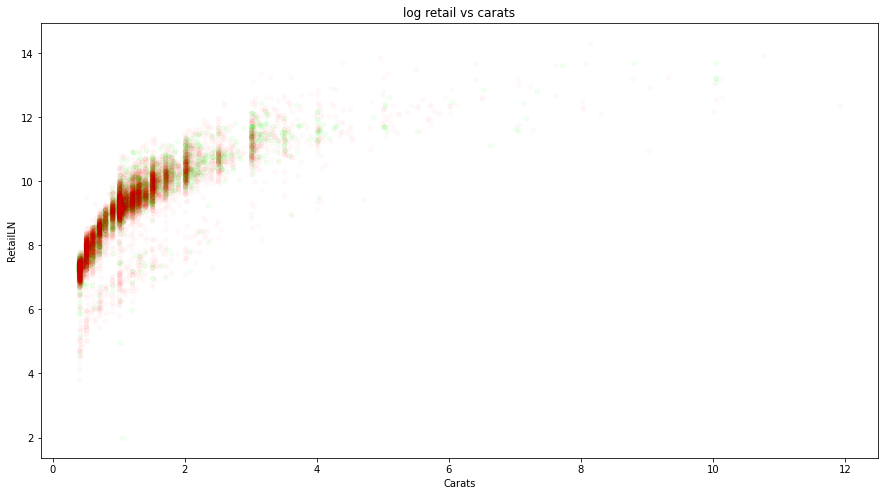

In [70]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'RetailLN', x="Carats", title="log retail vs carats", color='lime', alpha = 0.05)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'RetailLN', x = "Carats", color='r', alpha = 0.02)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

In [71]:
offersDF['PriceLN'] = np.log(offersDF.Price)
trainingDF['PriceLN'] = np.log(trainingDF.Price)

<AxesSubplot:title={'center':'log retail vs log Price'}, xlabel='PriceLN', ylabel='RetailLN'>

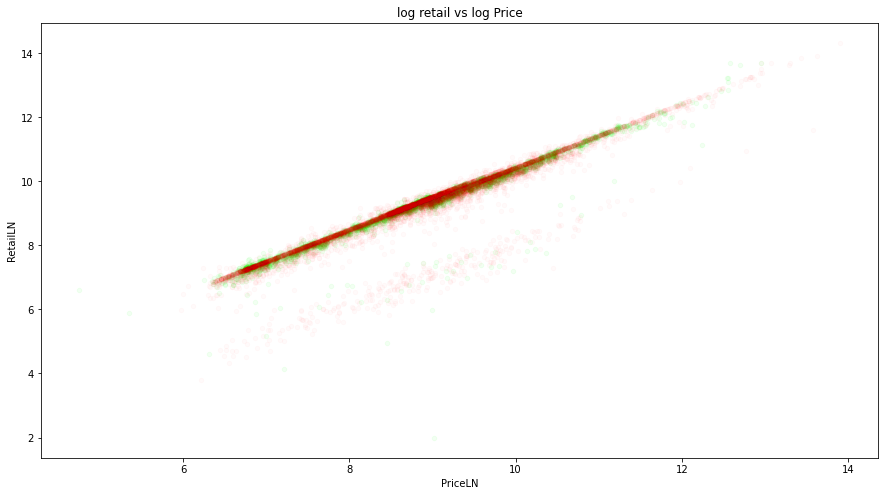

In [72]:

ax = offersDF.plot.scatter(figsize=(15,8), y = 'RetailLN', x="PriceLN", title="log retail vs log Price", color='lime', alpha = 0.05)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'RetailLN', x = "PriceLN", color='r', alpha = 0.02)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log retail vs conflict diamonds boolean'}, xlabel='Known_Conflict_Diamond_Code', ylabel='RetailLN'>

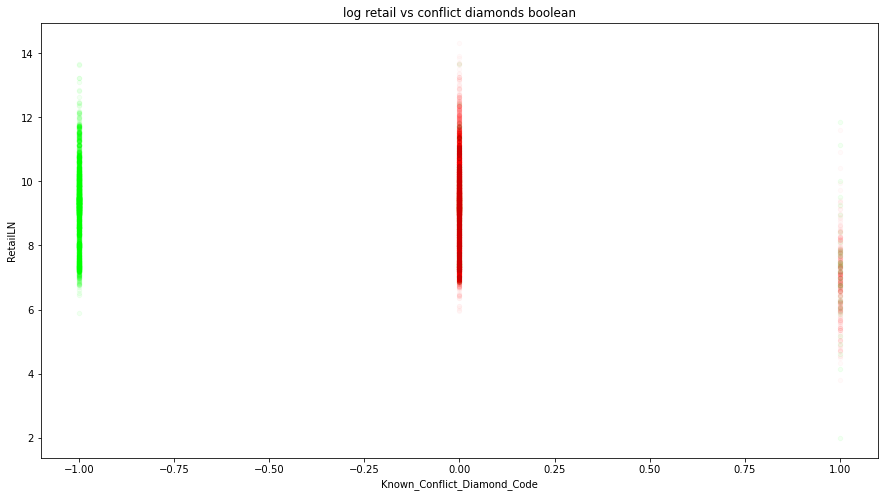

In [73]:

ax = offersDF.plot.scatter(figsize=(15,8), y = 'RetailLN', x="Known_Conflict_Diamond_Code", title="log retail vs conflict diamonds boolean", color='lime', alpha = 0.05)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'RetailLN', x = "Known_Conflict_Diamond_Code", color='r', alpha = 0.02)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log retail vs Color'}, xlabel='Color', ylabel='RetailLN'>

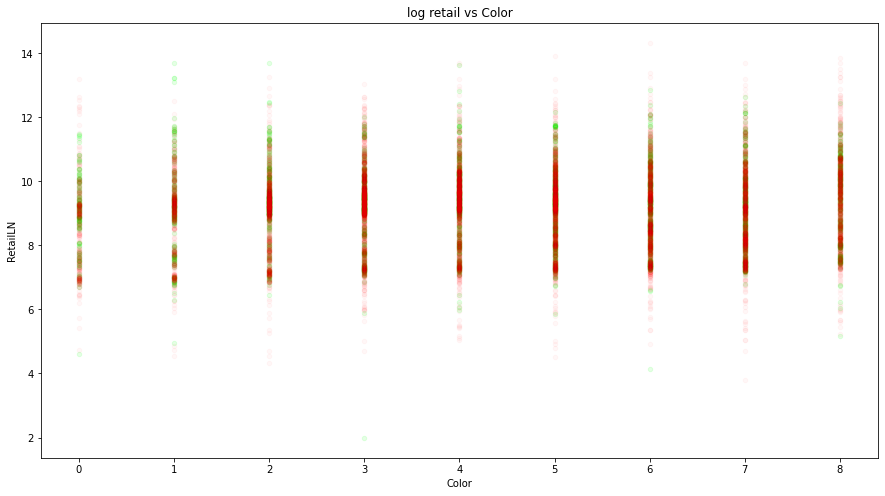

In [74]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'RetailLN', x="Color", title="log retail vs Color", color='lime', alpha = 0.1)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'RetailLN', x = "Color", color='red', alpha = 0.03)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log retail vs Table'}, xlabel='Table', ylabel='RetailLN'>

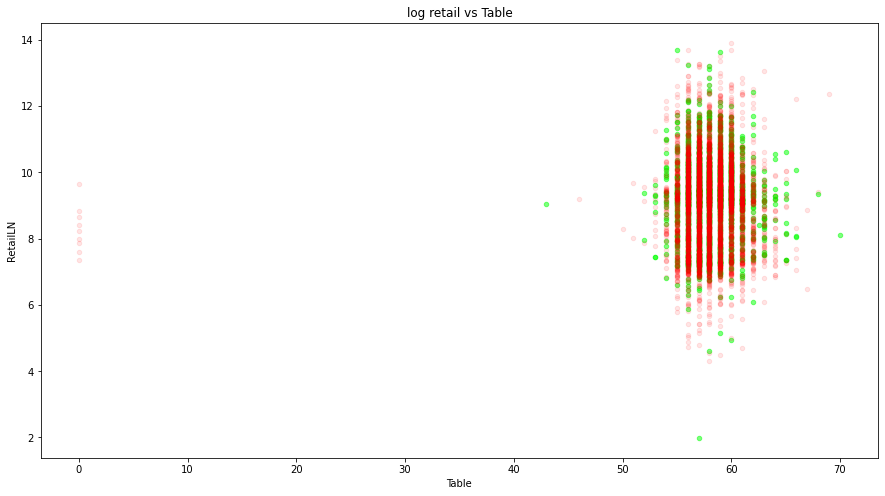

In [75]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'RetailLN', x="Table", title="log retail vs Table", color='lime', alpha = 0.5)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'RetailLN', x = "Table", color='red', alpha = 0.1)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log retail vs Volume'}, xlabel='Volume', ylabel='RetailLN'>

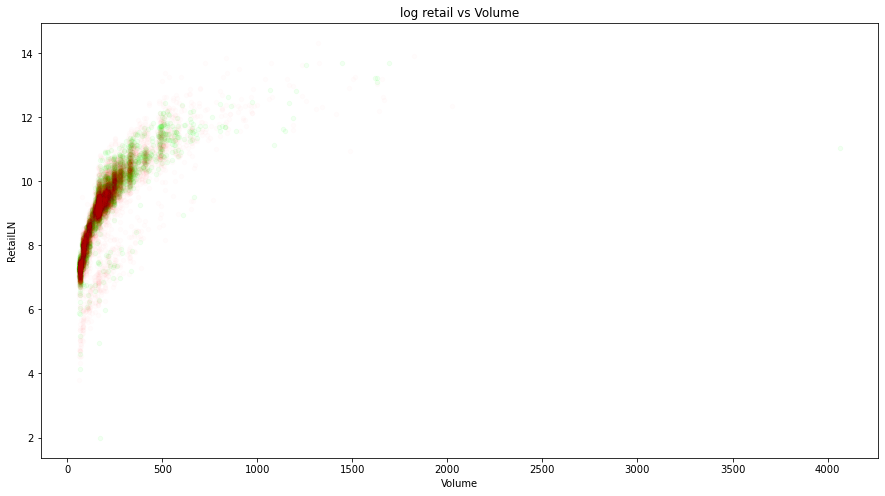

In [76]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'RetailLN', x="Volume", title="log retail vs Volume", color='lime', alpha = 0.05)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'RetailLN', x = "Volume", color='red', alpha = 0.01)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log retail vs Measurements1'}, xlabel='Measurements1', ylabel='RetailLN'>

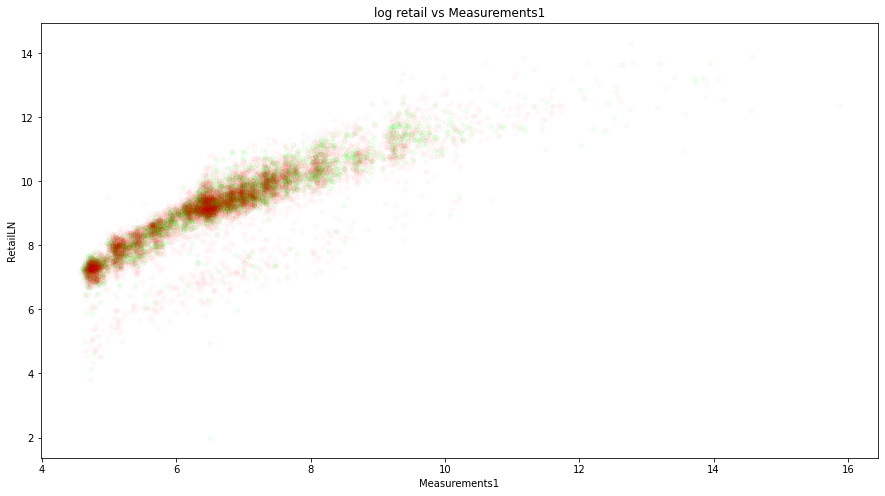

In [77]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'RetailLN', x="Measurements1", title="log retail vs Measurements1", color='lime', alpha = 0.05)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'RetailLN', x = "Measurements1", color='red', alpha = 0.02)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

<AxesSubplot:title={'center':'log retail vs Measurements3'}, xlabel='Measurements3', ylabel='RetailLN'>

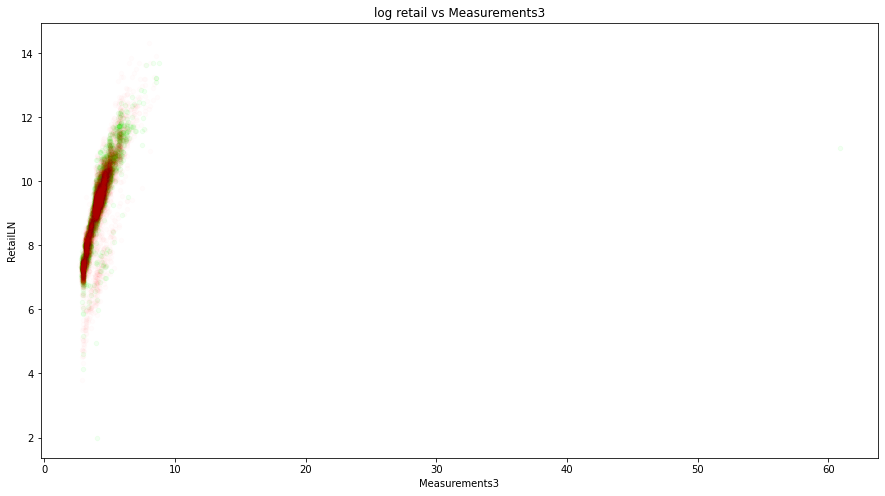

In [78]:
from matplotlib import pyplot as plt 
ax = offersDF.plot.scatter(figsize=(15,8), y = 'RetailLN', x="Measurements3", title="log retail vs Measurements3", color='lime', alpha = 0.05)
trainingDF.plot.scatter(ax=ax, figsize=(15,8), y = 'RetailLN', x = "Measurements3", color='red', alpha = 0.01)
#trainingDF['PriceLN'].plot(ax=ax, figsize=(15,8), title="training", color='r')

## obtain optimal product mix

In [79]:
finalDF = pd.read_csv('offers.csv')

In [80]:
finalDF['Price'] = offersDF.Price
finalDF['Retail'] = offersDF.Retail
finalDF['Profit'] = offersDF.Retail - offersDF.Price

In [81]:
finalDF

,id,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers,Price,Retail,Profit
0,8051,0.42,AGSL,SI2,L,,62.7,None,NaN,4.81x4.78x3.01,Excellent,Australia,Round,Excellent,57.0,1,NaN,574.916809,982.411316,407.494507
1,8052,0.40,GemEx,VS2,M,,63.8,None,NaN,4.64x4.61x2.95,Excellent,Australia,Round,Excellent,59.0,1,NaN,739.120178,1235.648926,496.528748
2,8053,0.41,AGSL,SI2,L,,62.2,None,True,4.76x4.74x2.95,Excellent,DR Congo,Round,Very good,58.0,1,NaN,553.740417,99.519760,-454.220642
3,8054,0.40,AGSL,SI1,K,,64.2,Strong Bl..,False,4.63x4.59x2.96,Very good,Angola,Emerald,Very good,58.0,1,NaN,691.908752,1125.200317,433.291565
4,8055,0.40,AGSL,VS2,L,,64.3,NaN,False,4.67x4.62x2.99,Excellent,Russia,Round,Very good,NaN,1,NaN,711.119324,1007.576904,296.457581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,10729,1.65,AGSL,VS1,E,Excellent,58.4,None,NaN,7.79x7.83x4.56,Excellent,Canada,Pear,Excellent,60.0,4,NaN,33898.625000,44466.507812,10567.882812
2679,10730,2.35,AGSL,SI2,E,Excellent,62.1,None,True,8.48x8.53x5.28,Excellent,Angola,Round,Excellent,58.0,2,NaN,37328.753906,10455.097656,-26873.656250
2680,10731,2.35,AGSL,SI2,J,Excellent,NaN,None,NaN,8.64x8.67x5.2,Excellent,Russia,Pear,Very good,NaN,2,NaN,24561.804688,37416.824219,12855.019531
2681,10732,5.02,AGSL,I1,J,Excellent,59.5,None,NaN,11.16x11.18*6.64,Excellent,Russia,Oval,Excellent,59.0,2,NaN,98471.507812,119341.968750,20870.460938


First, we must maximize the probability our vendors accept our offer, i.e. our offering price must be equal or greater than Price. Assuming no bias in our estimated predicted Price, the current predicted Price indicates the mean of the actual price distribution. To maximize acceptance rate, we increase our offer by 2 standard deviations from the mean. This means that each offer will have a 95% probability of acceptance.

Per results above, our standard deviation is approximately 15% of the mean.

In [82]:
#increase offer price by mean + 2*sd
finalDF.Price = finalDF.Price + 2 * finalDF.Price * 0.15

In [83]:
#this will be our final offer.
finalDF.Price

0          747.391846
1          960.856262
2          719.862549
3          899.481384
4          924.455139
            ...      
2678     44068.210938
2679     48527.382812
2680     31930.345703
2681    128012.960938
2682      8985.226562
Name: Price, Length: 2683, dtype: float32

now we perform optimal product mix calculation via linear programming

In [84]:
import pulp as p

Lp_prob = p.LpProblem('maximize_profit', p.LpMaximize) 
status = Lp_prob.solve()   # Solver
print(p.LpStatus[status])  # The solution status

Optimal


In [85]:
n_vars = finalDF.shape[0]

# Define some variable names and types
var_names = ['var_' + str(i) for i in range(n_vars)]

types = np.repeat(a = 'Integer', repeats = finalDF.shape[0])

In [86]:
# Create profit
profit = finalDF.Profit

# Create costs
costs = finalDF.Price

# Allocate a budget
budget = 5000000

In [87]:
# Create list of discreate variables
x_cont = [p.LpVariable(i, lowBound=0, upBound=1, cat=j) for i, j in zip(var_names, types)]
len(x_cont)

2683

In [88]:
# Do an optimisation to check its worked:
prob = p.LpProblem("Max Problem", p.LpMaximize)
prob += p.lpSum([x_cont[i]*profit[i] for i in range(n_vars)])
prob += p.lpSum([x_cont[i]*costs[i] for i in range(n_vars)]) <= budget
prob.solve()

C:\Users\Mark\anaconda3\lib\site-packages\pulp\pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


1

In [89]:
x_soln = np.array([x_cont[i].varValue for i in range(n_vars)])
print("costs: ", costs)
print("profit: ", profit)

#print("types: ", types)
print("\n x_soln: ", x_soln)

costs:  0          747.391846
1          960.856262
2          719.862549
3          899.481384
4          924.455139
            ...      
2678     44068.210938
2679     48527.382812
2680     31930.345703
2681    128012.960938
2682      8985.226562
Name: Price, Length: 2683, dtype: float32
profit:  0         407.494507
1         496.528748
2        -454.220642
3         433.291565
4         296.457581
            ...     
2678    10567.882812
2679   -26873.656250
2680    12855.019531
2681    20870.460938
2682     3963.973633
Name: Profit, Length: 2683, dtype: float32

 x_soln:  [1. 1. 0. ... 0. 0. 0.]


In [90]:
finalDF['Quantity'] = x_soln

In [91]:
finalDF.Offer = finalDF.Price * finalDF.Quantity

<ipython-input-91-6acdc4d65f86>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  finalDF.Offer = finalDF.Price * finalDF.Quantity


In [92]:
finalDF

,id,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,...,Regions,Shape,Symmetry,Table,Vendor,Offers,Price,Retail,Profit,Quantity
0,8051,0.42,AGSL,SI2,L,,62.7,None,NaN,4.81x4.78x3.01,...,Australia,Round,Excellent,57.0,1,NaN,747.391846,982.411316,407.494507,1.0
1,8052,0.40,GemEx,VS2,M,,63.8,None,NaN,4.64x4.61x2.95,...,Australia,Round,Excellent,59.0,1,NaN,960.856262,1235.648926,496.528748,1.0
2,8053,0.41,AGSL,SI2,L,,62.2,None,True,4.76x4.74x2.95,...,DR Congo,Round,Very good,58.0,1,NaN,719.862549,99.519760,-454.220642,0.0
3,8054,0.40,AGSL,SI1,K,,64.2,Strong Bl..,False,4.63x4.59x2.96,...,Angola,Emerald,Very good,58.0,1,NaN,899.481384,1125.200317,433.291565,0.0
4,8055,0.40,AGSL,VS2,L,,64.3,NaN,False,4.67x4.62x2.99,...,Russia,Round,Very good,NaN,1,NaN,924.455139,1007.576904,296.457581,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,10729,1.65,AGSL,VS1,E,Excellent,58.4,None,NaN,7.79x7.83x4.56,...,Canada,Pear,Excellent,60.0,4,NaN,44068.210938,44466.507812,10567.882812,0.0
2679,10730,2.35,AGSL,SI2,E,Excellent,62.1,None,True,8.48x8.53x5.28,...,Angola,Round,Excellent,58.0,2,NaN,48527.382812,10455.097656,-26873.656250,0.0
2680,10731,2.35,AGSL,SI2,J,Excellent,NaN,None,NaN,8.64x8.67x5.2,...,Russia,Pear,Very good,NaN,2,NaN,31930.345703,37416.824219,12855.019531,0.0
2681,10732,5.02,AGSL,I1,J,Excellent,59.5,None,NaN,11.16x11.18*6.64,...,Russia,Oval,Excellent,59.0,2,NaN,128012.960938,119341.968750,20870.460938,0.0


In [93]:
print(f"we will offer {sum(finalDF.Offer)} toward our vendors")

we will offer 4999998.1831970215 toward our vendors


In [94]:
finalDF['ExpectedProfits'] = finalDF.Profit * finalDF.Quantity
sum(finalDF.ExpectedProfits)
print(f'We expect to receive {sum(finalDF.ExpectedProfits)} in profit')

We expect to receive 3753676.119995117 in profit


In [95]:
finalDF.to_csv('final.csv')

## Question 2

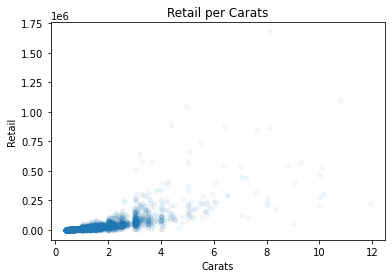

In [96]:
ax = trainingDF.plot.scatter(y = 'Retail', x="Carats", title="Retail per Carats", alpha = 0.05)

In [97]:
from sklearn.linear_model import LinearRegression

X = trainingDF.Carats.values.reshape(-1,1)
y = trainingDF.Retail.values.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

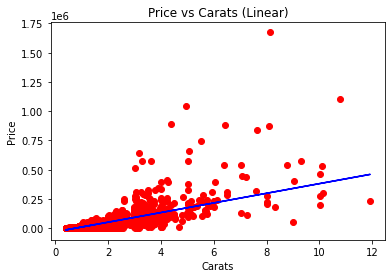

In [98]:
plt.scatter(X,y, color='red')
plt.plot(X, lin_reg.predict(X),color='blue')
plt.title("Price vs Carats (Linear)")
plt.xlabel('Carats')
plt.ylabel('Price')
plt.show()

In [99]:
# r squared and adjusted r squared
print (lin_reg.score(X, y), 1 - (1-lin_reg.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
# 0.877643371323 0.863248473832 

0.5130755561287617 0.5130150535885192


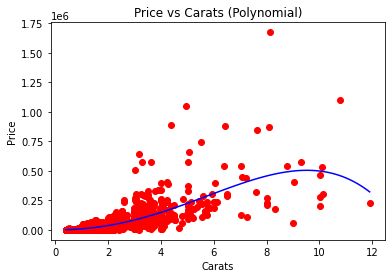

In [100]:
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
 
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 
 
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
 
plt.title("Price vs Carats (Polynomial)")
plt.xlabel('Carats')
plt.ylabel('Price')
plt.show()

not much difference between the linear and polynomial regression (other than polynomial regression overfits a bit at the high end of carats)

In [101]:
sortedDF = trainingDF.sort_values(by='Carats')

C:\Users\Mark\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.61153764e+04 3.53902357e-01 1.00000000e+00]


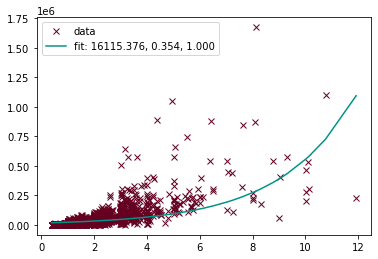

7501    1.856605e+04
323     1.856605e+04
322     1.856605e+04
321     1.856605e+04
671     1.856605e+04
            ...     
7168    5.628164e+05
4062    5.769333e+05
4052    5.830913e+05
7227    7.261548e+05
6904    1.094759e+06
Name: Carats, Length: 8050, dtype: float64

In [102]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func_exp(x, a, b, c):
        c = 0
        return a * np.exp(b * x) + c

def exponential_regression (x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 0.01, 1))
    print(popt)
    puntos = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")
    curva_regresion = plt.plot(x_data, func_exp(x_data, *popt), color='xkcd:teal', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.legend()
    plt.show()
    return func_exp(x_data, *popt)

x_data = sortedDF.Carats
y_data = sortedDF.Retail
exponential_regression(x_data, y_data)

exponential regression is not much better.

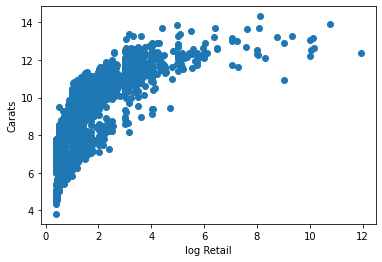

(8050, 1)
(8050, 1)
(8050, 1)
0.789446826119097


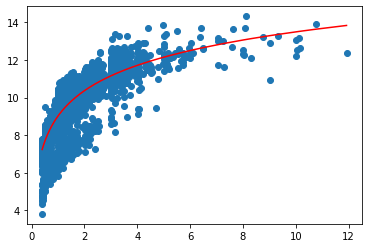

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import math

#X = Age
#Y = Height
X = sortedDF.Carats.values.reshape(-1,1)
Y = sortedDF.RetailLN.values.reshape(-1,1)

# Plot the data :
plt.scatter(X,Y)
plt.xlabel("log Retail")
plt.ylabel("Carats")
plt.show()

# 1st column of our X matrix should be 1 :
n = len(X)
x_bias = np.ones((n,1))

print (X.shape)
print (x_bias.shape)

# Reshaping X :
X = np.reshape(X,(n,1))
print (X.shape)

# Going with the formula :
# Y = a + b*ln(X)
X_log = np.log(X)

# Append the X_log to X_bias :
x_new = np.append(x_bias,X_log,axis=1)

# Transpose of a matrix :
x_new_transpose = np.transpose(x_new)

# Matrix multiplication :
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

# Find inverse :
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)

# Matrix Multiplication :
temp_2 = x_new_transpose.dot(Y)

# Find the coefficient values :
theta = temp_1.dot(temp_2)

# Plot the data :
a = theta[0]
b = theta[1]
Y_plot = a + b*np.log(X)
plt.scatter(X,Y)
plt.plot(X,Y_plot,c="r")

# Check the accuracy :
from sklearn.metrics import r2_score
Accuracy = r2_score(Y,Y_plot)
print (Accuracy)

the logarithmic relationship looks much more fitting